In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("default")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Saran Sai\Desktop\AI- UNT\Feature Engineering\ICE-1\01 Dataset Creation\output.csv", sep=',')

In [3]:
df.head()

,Article Content,Category
0,The term ‘autopilot’ has been used for decades...,Autonomous Cars
1,Tesla most famously branded its self-driving f...,Autonomous Cars
2,This article provides a breakdown of cars with...,Autonomous Cars
3,"First, let’s define exactly what constitutes ‘...",Autonomous Cars
4,Learn more about this by reading our article o...,Autonomous Cars


In [4]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of Paragraphs')),
    tooltip=[alt.Tooltip('count()', title='Number of Paragraphs'), 'Category'],
    color='Category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of Paragraphs in Each Article",
)

alt.LayerChart(...)

In [5]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

In [6]:
df['News_length'] = df['Article Content'].str.len()

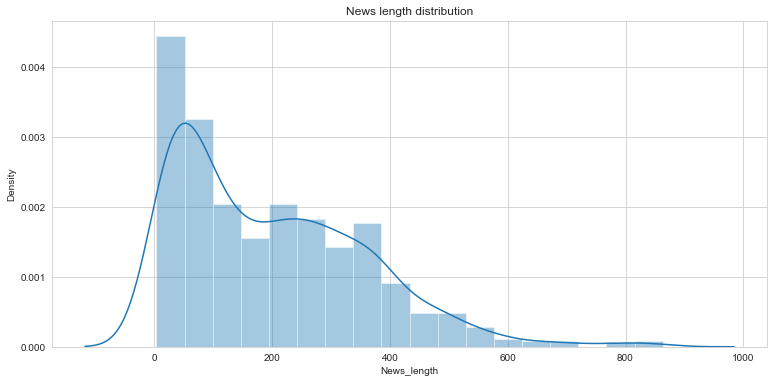

In [7]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [8]:
df['News_length'].describe()

count    985.000000
mean     199.674112
std      160.646516
min        4.000000
25%       61.000000
50%      168.000000
75%      304.000000
max      863.000000
Name: News_length, dtype: float64

In [9]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

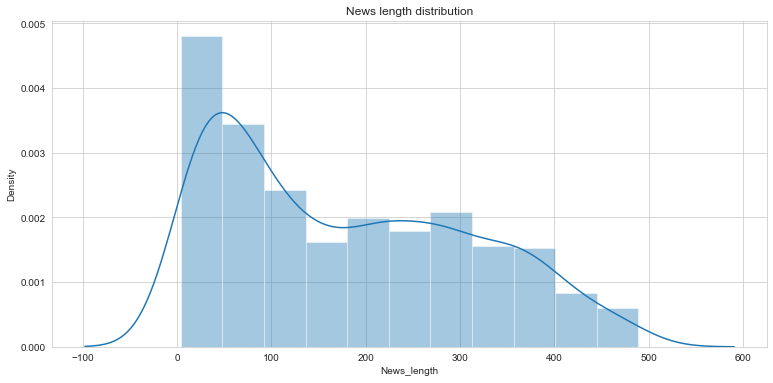

In [10]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

In [11]:
df_more700 = df[df['News_length'] > 700]
len(df_more700)

9

In [12]:
df_more700['Article Content'].iloc[0]

'Mobileye, which was purchased by Intel, is arguably the leading OEM in providing autopilot technology, via their EyeQ line of visual perception chips, to auto manufacturers. They famously provided Autopilot technology for the first-generation Tesla Model S vehicles that came with Enhanced Autopilot. Later, Tesla began to develop its own technology as Elon Musk wanted to push autonomous driving technology faster. \xa0Mobileye previously focused on perception technology (i.e. identifying objects) with its EyeQ chips and it was up to the manufacturers to integrate driving control hardware and software but now Mobileye is also beginning to offer “full-stack” autopilot solutions.  Today Mobileye is providing autopilot-like technology to manufacturers such as Audi, BMW and Nissan via their EyeQ 4 and EyeQ 5 chipsets.  '

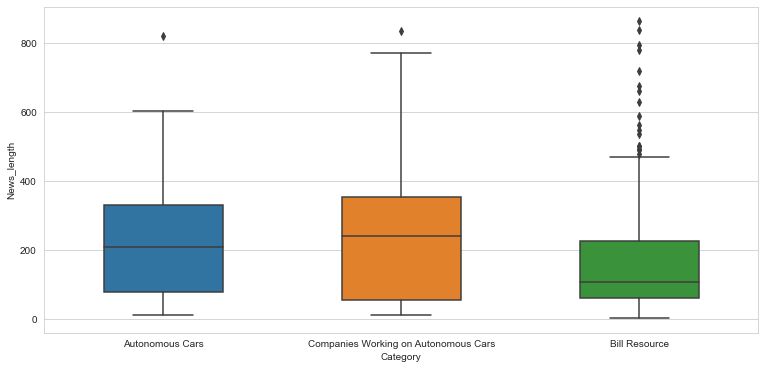

In [13]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

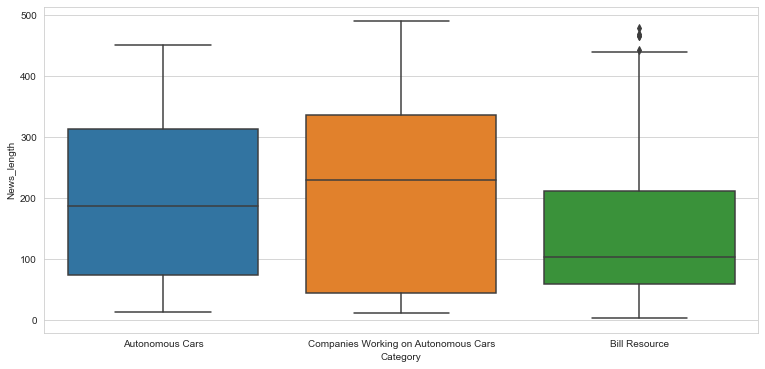

In [14]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');

In [15]:
with open('News_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)